### 配合課程影片 hmwu_StatR-05.2
### Exercise 5-2

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
import numpy as np
import pylab
import scipy.stats as stats
import pandas as pd

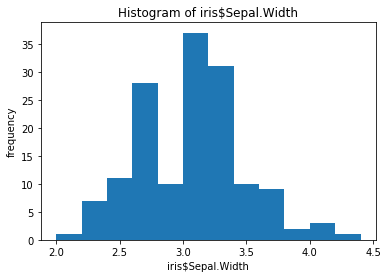

In [2]:
# 14/19
# 常態分佈檢定
# 請以常態機率圖檢定 iris$Sepal.Width 是否服從常態分配：

# par(mfrow = c(1, 2))
# hist(iris$Sepal.Width)
# qqnorm(iris$Sepal.Width)
# qqline(iris$Sepal.Width, col = "red")

iris = datasets.load_iris()
X = iris.data[:, 1:2]
x=[]
for i in range(len(X)):
    x.extend(X[i])

plt.title("Histogram of iris$Sepal.Width")
plt.xlabel('iris$Sepal.Width')
plt.ylabel('frequency')
    
plt.hist(x, bins = 12)
plt.show()



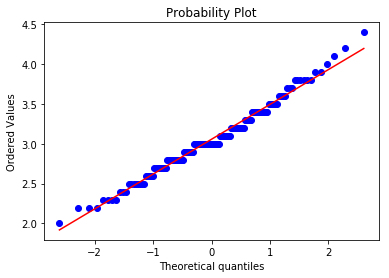

In [3]:
stats.probplot(x, dist = "norm", plot = pylab)
plt.show()

In [4]:
# 15/19
# 請以 One-sample Kolmogorov-Smirnov test 檢定 iris$Sepal.Width 是否服從常態分配：
# Hint: 用樣本累計頻率分佈 x 與理論累積分佈 y 的差距，藉以判定是否服從特定分配
# Hint: 需以樣本提供欲檢定理論累積分佈 y 的待估參數：N(mean, sd)

stats.kstest(x, 'norm', args = (np.mean(x), np.std(x)))



KstestResult(statistic=0.10583307189330171, pvalue=0.0644929989865557)

In [5]:
stats.anderson(x, 'gumbel_r')

#dist : {‘norm’, ’expon’, ’logistic’, ’gumbel’, ’gumbel_l’, gumbel_r’, ‘extreme1’}, 

#print stats.shapiro(x)


AndersonResult(statistic=1.6973980722535202, critical_values=array([0.466, 0.627, 0.745, 0.863, 1.021]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ]))

In [6]:
# 19/19
# 請以卡方獨立性檢定觀察兩個類別變數（性別、政黨）的相關性：
# Hint: 卡方獨立性檢定需根據關係列聯表 M (Contingency table)做計算

from scipy.stats import chi2_contingency

df = pd.DataFrame(data = [[762, 327, 468], [484, 239, 477]], columns = ['Democrat', 'Independent', 'Republican'])
df = df.rename(index = {0:'F', 1:'M'})

print (chi2_contingency(df))

(30.070149095754672, 2.9535891832117595e-07, 2, array([[703.67138194, 319.64526659, 533.68335147],
       [542.32861806, 246.35473341, 411.31664853]]))
